In [1]:
# importing libraries
import pandas            as pd                        # data science essentials
import matplotlib.pyplot as plt                       # data visualization
import seaborn           as sns                       # enhanced data viz
import numpy             as np                        # numpy package
from sklearn.model_selection import train_test_split  # train-test split

import sklearn.linear_model                          # logistic regression
import statsmodels.formula.api as smf                # logistic regression

from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score

from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # GBM and RF


from sklearn.preprocessing import StandardScaler     # standard scaler

from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.metrics import accuracy_score           # accuracy_score
from sklearn.model_selection import RandomizedSearchCV # randomization package for hypertuning
from sklearn.tree import plot_tree                   # tree plots

from catboost import CatBoostClassifier

# DATA

## READING THE DATA

In [2]:
# Run train data
titanic_train = pd.read_csv('train.csv')

# Run test data
titanic_test = pd.read_csv('test.csv')

In [3]:
# Reading train data
titanic_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
# Reading test data
titanic_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
# Columns 
print('\033[1mTRAIN DATA\033[0m')
print(f'ROWS: {titanic_train.shape[0]}')
print(f'COLUMNS: {titanic_train.shape[1]}')

print("\033[1mTEST DATA\033[0m")
print(f'ROWS: {titanic_test.shape[0]}')
print(f'COLUMNS: {titanic_test.shape[1]}')

TRAIN DATA
ROWS: 8693
COLUMNS: 14
TEST DATA
ROWS: 4277
COLUMNS: 13


## MISSING VALUES

In [6]:
# Information about Train
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
# Information about Test
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


## JOINING TRAINING AND TARGET

In [8]:
titanic_train['set'] = 'Training'
titanic_test ['set'] = 'Testing'

# concatenating both datasets together for mv and feature engineering
titanic_df = titanic_train.append(other = titanic_test)

# resetting index to avoid problems later in the code
titanic_df.reset_index(drop = False,
                       inplace = True)

C:\Users\hanzn\AppData\Local\Temp\ipykernel_12480\4111620901.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  titanic_df = titanic_train.append(other = titanic_test)


In [9]:
# Reading joined dataset
titanic_df.head()

,index,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,set
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Training
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Training
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Training
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Training
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Training


In [10]:
# Describe joined dataset
titanic_df.describe()

,index,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12970.000000,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,3617.887741,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,2408.607419,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1621.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3242.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5449.750000,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,8692.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## IMPUTING MISSING DATA AND CONVERTING TYPES

In [11]:
# imputing in missing values for RoomService
titanic_df[ 'RoomService' ].fillna(value = 0, inplace = True)

# imputing in missing values for Spa
titanic_df[ 'Spa' ].fillna(value = 0, inplace = True)

# imputing in missing values for FoodCourt
titanic_df[ 'FoodCourt' ].fillna(value = 0, inplace = True)

# imputing in missing values for ShoppingMall
titanic_df[ 'ShoppingMall' ].fillna(value = 0, inplace = True)

# imputing in missing values for FoodCourt
titanic_df[ 'VRDeck' ].fillna(value = 0, inplace = True)

# imputing in missing values for HomePlanet
titanic_df[ 'HomePlanet' ].fillna(value = "Unkwn_HomePlanet", inplace = True)

# imputing in missing values for VIP
titanic_df[ 'VIP' ].fillna(value = "Unknown_VIP", inplace = True)

# imputing in missing values for Destination
titanic_df[ 'Destination' ].fillna(value = "Unkwn_Destination", inplace = True)

# imputing in missing values for Age
age_median = titanic_df[ 'Age' ].median()
titanic_df[ 'Age' ].fillna(value = age_median, inplace = True)

# imputing in missing values for CryoSleep
# titanic_df[ 'CryoSleep' ].fillna(value = False, inplace = True)
titanic_df[ 'CryoSleep' ].fillna(value = 'Unknown_Cryo', inplace = True)

In [12]:
# Turning CryoSleep to Boolean values to Integers
# titanic_df['CryoSleep'] = titanic_df['CryoSleep'].astype(bool)
# titanic_df['CryoSleep'] = titanic_df['CryoSleep'].astype(int)

## INITIAL FEATURE ENGINEERING FOR ANALYSIS

### Cabin

#### Deck

In [13]:
# Extracting Deck
titanic_df['Deck'] = titanic_df['Cabin'].str.extract(r'^([^/]+)/')

# imputing in missing values for Deck
titanic_df[ 'Deck' ].fillna(value = 'Unknown_Cabin', inplace = True)

#### Cabin Number

In [14]:
# Extracting Number
titanic_df['Cabin_Number'] = titanic_df['Cabin'].str.extract(r'^\D*(\d+)\D*$')

# imputing in missing values for Number
# Setting miising values for Number to 2000 
titanic_df[ 'Cabin_Number' ].fillna(value = 2000, inplace = True)

# Convert to int
titanic_df['Cabin_Number'] = titanic_df['Cabin_Number'].astype(int)

#### Side

In [15]:
# Extracting Side
titanic_df['Side'] = titanic_df['Cabin'].str.extract(r'/([^/]+)$')

# imputing in missing values for Side
titanic_df[ 'Side' ].fillna(value = 'Unknown_Side', inplace = True)

In [16]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         12970 non-null  int64  
 1   PassengerId   12970 non-null  object 
 2   HomePlanet    12970 non-null  object 
 3   CryoSleep     12970 non-null  object 
 4   Cabin         12671 non-null  object 
 5   Destination   12970 non-null  object 
 6   Age           12970 non-null  float64
 7   VIP           12970 non-null  object 
 8   RoomService   12970 non-null  float64
 9   FoodCourt     12970 non-null  float64
 10  ShoppingMall  12970 non-null  float64
 11  Spa           12970 non-null  float64
 12  VRDeck        12970 non-null  float64
 13  Name          12676 non-null  object 
 14  Transported   8693 non-null   object 
 15  set           12970 non-null  object 
 16  Deck          12970 non-null  object 
 17  Cabin_Number  12970 non-null  int32  
 18  Side          12970 non-nu

### Age

In [17]:
# Bracketing passengers based on Age_Bracket
titanic_df['Age_Bracket'] = np.where((titanic_df['Age'] >= 0)  & (titanic_df['Age'] <= 19), 'Low_Age',
                            np.where((titanic_df['Age'] >= 20)  & (titanic_df['Age'] <= 40), 'Mid_Age',
                            np.where((titanic_df['Age'] >= 41)  & (titanic_df['Age'] <= 60), 'High_Age',
                            np.where(titanic_df['Age']  >= 61, 'Old_Age', None))))

### Spending

In [18]:
# TOTAL_EXPENSES = RoomService + FoodCourt + ShoppingMall + Spa + VRDeck
titanic_df['TOTAL_EXPENSES'] = titanic_df['RoomService'] + titanic_df['FoodCourt'] + titanic_df['ShoppingMall'] + titanic_df['Spa'] + titanic_df['VRDeck']

### Passenger Group

In [19]:
# split the passenger IDs into two columns
titanic_df[['group', 'id']] = titanic_df['PassengerId'].str.split('_', expand=True)

titanic_df['Grouped'] = ((titanic_df['group'].value_counts() > 1).
                            reindex(titanic_df['group'])).tolist()

titanic_df['Grouped'] = titanic_df['Grouped'].astype(int)

# EDA

## TRAIN

In [20]:
# Creating separate DataFrame for Training Set to do EDA
titanic_df_train = titanic_df[ titanic_df['set'] == 'Training' ]
titanic_df_train.head()

,index,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,...,Transported,set,Deck,Cabin_Number,Side,Age_Bracket,TOTAL_EXPENSES,group,id,Grouped
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,...,False,Training,B,0,P,Mid_Age,0.0,0001,01,0
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,...,True,Training,F,0,S,Mid_Age,736.0,0002,01,0
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,...,False,Training,A,0,S,High_Age,10383.0,0003,01,1
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,...,False,Training,A,0,S,Mid_Age,5176.0,0003,02,1
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,...,True,Training,F,1,S,Low_Age,1091.0,0004,01,0


In [21]:
# Statistcal Descriptions for Training Set
titanic_df_train.describe(include = 'number')

,index,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Number,TOTAL_EXPENSES,Grouped
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,4346.000000,28.790291,220.009318,448.434027,169.572300,304.588865,298.261820,632.408029,1440.866329,0.447256
std,2509.597278,14.341404,660.519050,1595.790627,598.007164,1125.562559,1134.126417,547.569777,2803.045694,0.497239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2173.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,173.000000,0.000000,0.000000
50%,4346.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,448.000000,716.000000,0.000000
75%,6519.000000,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000,1040.000000,1441.000000,1.000000
max,8692.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,2000.000000,35987.000000,1.000000


In [22]:
# Statistcal Descriptions for Training Set
titanic_df_train.describe(include = 'object')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported,set,Deck,Side,Age_Bracket,group,id
count,8693,8693,8693,8494,8693,8693,8493,8693,8693,8693,8693,8693,8693,8693
unique,8693,4,3,6560,4,3,8473,2,1,9,3,4,6217,8
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall,True,Training,F,S,Mid_Age,4498,01
freq,1,4602,5439,8,5915,8291,2,4378,8693,2794,4288,4804,8,6217


In [23]:
# Count of transported in Train dataset
print(f"Transported\n{titanic_train['Transported'].value_counts(normalize = True)}")

Transported
True     0.503624
False    0.496376
Name: Transported, dtype: float64


### HomePlanet

HomePlanet        Transported
Earth             False          2651
                  True           1951
Europa            True           1404
Mars              True            920
                  False           839
Europa            False           727
Unkwn_HomePlanet  True            103
                  False            98
dtype: int64


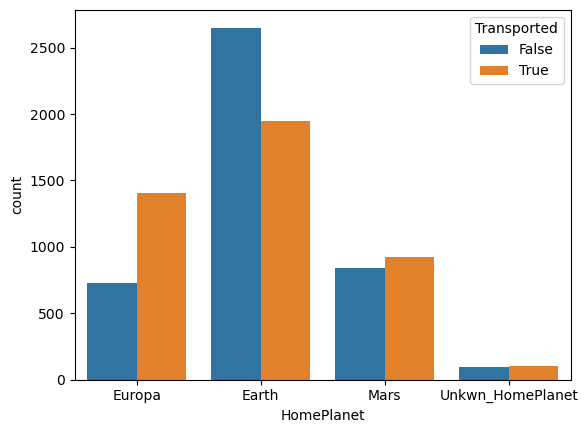

In [24]:
# Transported Count Based on HomePlanet
HomePlanet_Transported = titanic_df_train[['HomePlanet', 'Transported']].value_counts()
print(HomePlanet_Transported)

# Creating Count Plot for HomePlanet vs Transported
sns.countplot(data = titanic_df_train, x="HomePlanet", hue = "Transported")
plt.show()


### CryoSleep

CryoSleep  Transported
True       True           0.817583
           False          0.182417
dtype: float64


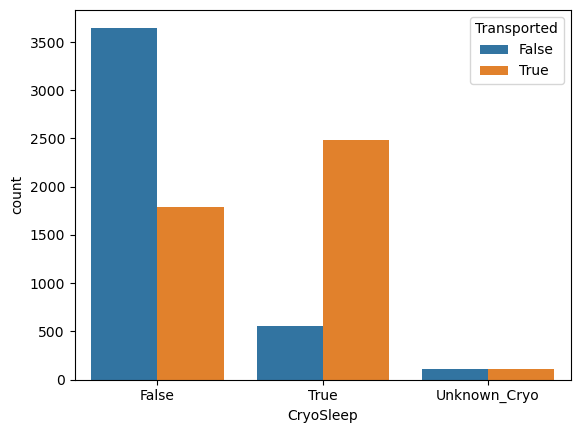

In [25]:
# Transported Count Based on CryoSleep
Cryo = titanic_df_train[titanic_df_train['CryoSleep'] == True]
CryoSleep_Transported = Cryo[['CryoSleep', 'Transported']].value_counts(normalize = True)
print(CryoSleep_Transported)

# Creating Count Plot for CryoSleep vs Transported
sns.countplot(data = titanic_df_train, x="CryoSleep", hue = "Transported")
plt.show()

### Cabin

#### Deck

Deck           Transported
F              False          1565
G              True           1321
               False          1238
F              True           1229
B              True            572
E              False           563
C              True            508
E              True            313
D              False           271
C              False           239
B              False           207
D              True            207
A              False           129
               True            127
Unknown_Cabin  True            100
               False            99
T              False             4
               True              1
dtype: int64


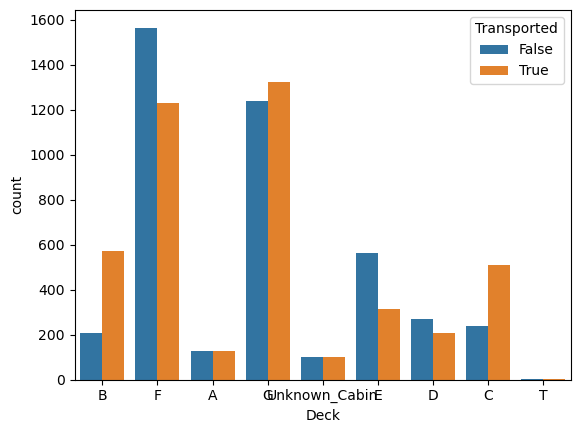

In [26]:
# Transported Count Based on Deck
Deck_Transported = titanic_df_train[['Deck', 'Transported']].value_counts()
print(Deck_Transported)

# Creating Count Plot for Deck vs Transported
sns.countplot(data = titanic_df_train, x="Deck", hue = "Transported")
plt.show()

#### Side

Side          Transported
S             True           2380
P             False          2308
S             False          1908
P             True           1898
Unknown_Side  True            100
              False            99
dtype: int64


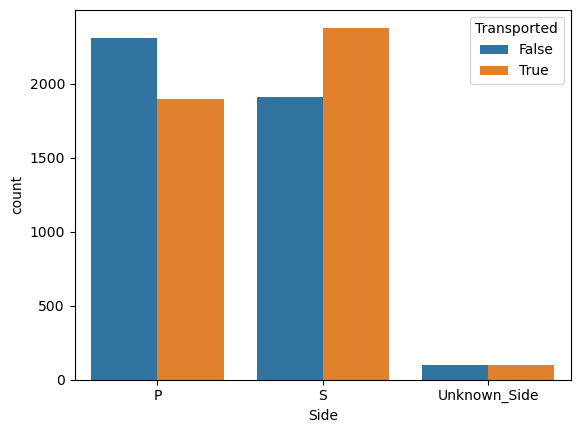

In [27]:
# Transported Count Based on Side
Side_Transported = titanic_df_train[['Side', 'Transported']].value_counts()
print(Side_Transported)

# Creating Count Plot for Side vs Transported
sns.countplot(data = titanic_df_train, x="Side", hue = "Transported")
plt.show()

#### Number

In [28]:
# Checking which cabin numbers are in Port
titanic_df_train['Cabin_Number'][ titanic_df['Side'] == 'P' ].describe(include = 'number')

# Both sides' cabin numbers rage from 0 - 1800

count    4206.000000
mean      620.004042
std       525.305139
min         0.000000
25%       169.000000
50%       454.000000
75%      1032.000000
max      1894.000000
Name: Cabin_Number, dtype: float64

In [29]:
# Creating lists for Cabin numbers
number_labels = ['NO_CABIN', 'FRONT', 'MIDDLE','BACK', 'Unkwn_Cabin']
number_bins = [-1, 0, 600, 1200, 1900, 2001]

# Creating bins for df and for df_train
titanic_df['Cabin_Location'] = pd.cut(titanic_df['Cabin_Number'], bins = number_bins, labels = number_labels)
titanic_df_train['Cabin_Location'] = pd.cut(titanic_df['Cabin_Number'], bins = number_bins, labels = number_labels)

C:\Users\hanzn\AppData\Local\Temp\ipykernel_12480\1904685064.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df_train['Cabin_Location'] = pd.cut(titanic_df['Cabin_Number'], bins = number_bins, labels = number_labels)


Cabin_Location  Transported
FRONT           True           2527
                False          2508
MIDDLE          True           1129
BACK            False           858
MIDDLE          False           838
BACK            True            616
Unkwn_Cabin     True            100
                False            99
NO_CABIN        False            12
                True              6
dtype: int64


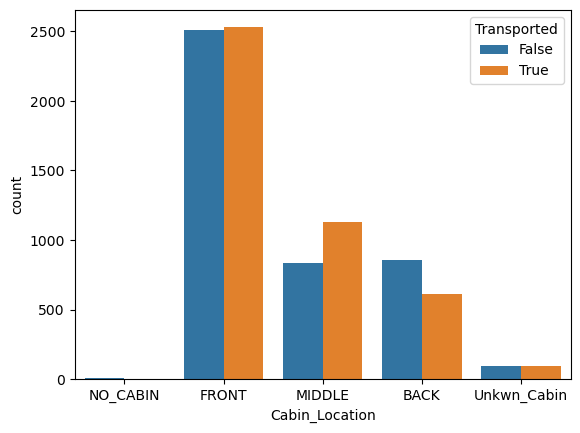

In [30]:
# Transported Count Based on Cabin_Location
Location_Transported = titanic_df_train[['Cabin_Location', 'Transported']].value_counts()
print(Location_Transported)

# Creating Count Plot for Side vs Transported
sns.countplot(data = titanic_df_train, x="Cabin_Location", hue = "Transported")
plt.show()

### Destination

Destination        Transported
TRAPPIST-1e        False          3128
                   True           2787
55 Cancri e        True           1098
                   False           702
PSO J318.5-22      True            401
                   False           395
Unkwn_Destination  True             92
                   False            90
dtype: int64


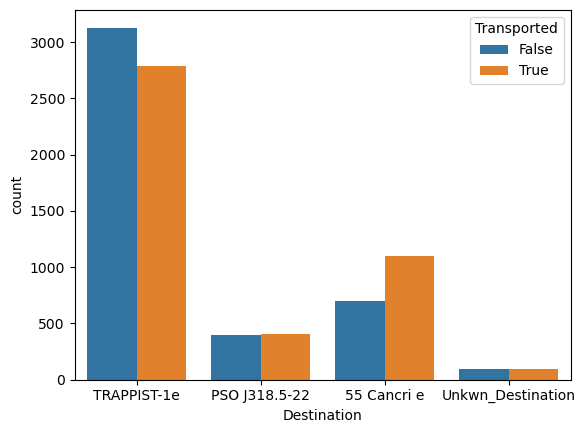

In [31]:
# Transported Count Based on Destination
Destination_Transported = titanic_df_train[['Destination', 'Transported']].value_counts()
print(Destination_Transported)

# Creating Count Plot for Destination vs Transported
sns.countplot(data = titanic_df_train, x="Destination", hue = "Transported")
plt.show()


### Age

Age_Bracket  Transported
Low_Age      True           0.588971
             False          0.411029
dtype: float64


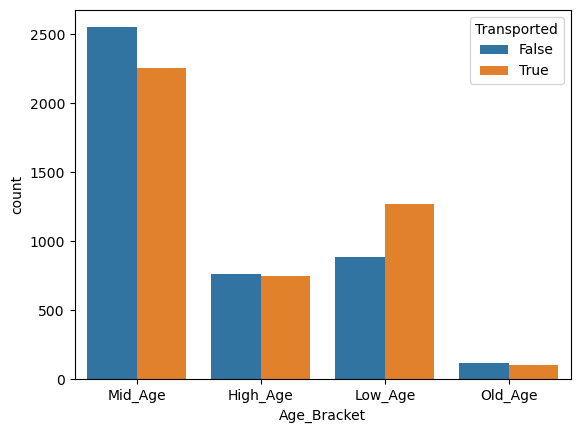

In [32]:
# Transported Count Based on Age
Low_Age = titanic_df_train[titanic_df_train['Age_Bracket'] == 'Low_Age']
Age_Transported = Low_Age[['Age_Bracket', 'Transported']].value_counts(normalize = True)
print(Age_Transported)

# Creating Count Plot for Age vs Transported
sns.countplot(data = titanic_df_train, x="Age_Bracket", hue = "Transported")
plt.show()

### VIP

VIP          Transported
False        True           4198
             False          4093
True         False           123
Unknown_VIP  True            104
             False            99
True         True             76
dtype: int64


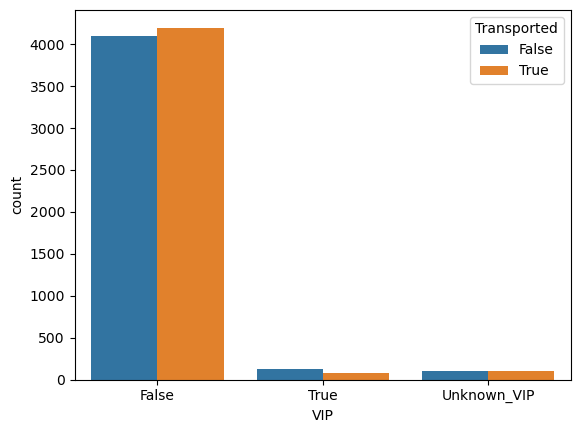

In [33]:
# Transported Count Based on VIP
VIP_Transported = titanic_df_train[['VIP', 'Transported']].value_counts()
print(VIP_Transported)

# Creating Count Plot for VIP vs Transported
sns.countplot(data = titanic_df_train, x="VIP", hue = "Transported")
plt.show()

### Passenger Group

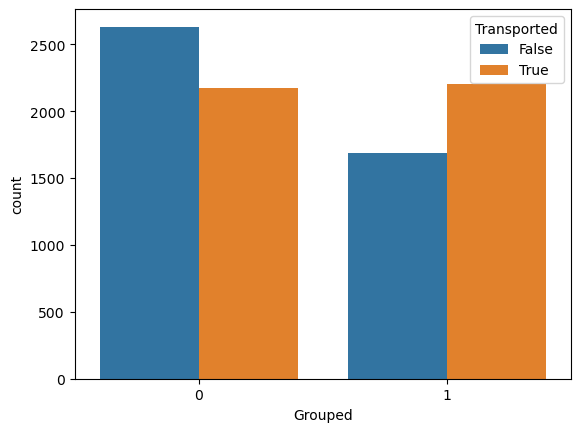

In [34]:
# Creating Count Plot for VIP vs Transported
sns.countplot(data = titanic_df_train, x="Grouped", hue = "Transported")
plt.show()

### Spending

#### Total Spending

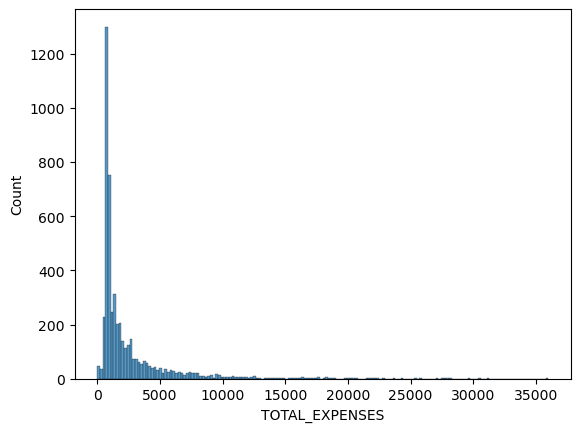

In [35]:
# Creating Count Plot for Total Expenses vs Transported
sns.histplot(data = titanic_df_train[titanic_df_train["TOTAL_EXPENSES"] > 0], x="TOTAL_EXPENSES")
plt.show()

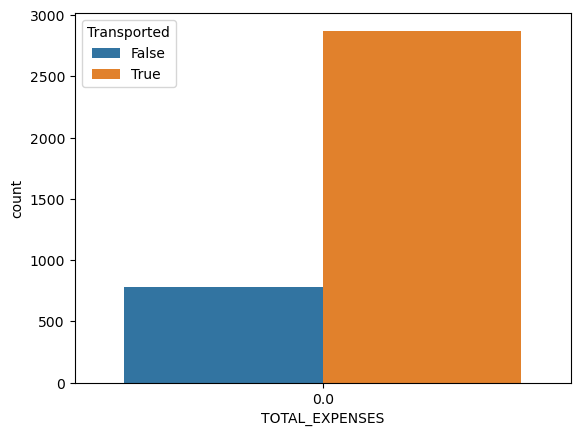

In [36]:
# Creating Count Plot for No Expenses vs Transported
sns.countplot(data = titanic_df_train[titanic_df_train['TOTAL_EXPENSES'] == 0], x="TOTAL_EXPENSES", hue = "Transported")
plt.show()

In [37]:
# Creating lists for Total Expenses
spending_labels = ['No_Spending', 'Low_Spending', 'Mid_Spending','High_Spending']
spending_bins = [-1, 0, 1000, 2000, 35988]

# Creating bins for df and for df_train
titanic_df['Spending_Category'] = pd.cut(titanic_df['TOTAL_EXPENSES'], bins = spending_bins, labels = spending_labels)
titanic_df_train['Spending_Category'] = pd.cut(titanic_df['TOTAL_EXPENSES'], bins = spending_bins, labels = spending_labels)

C:\Users\hanzn\AppData\Local\Temp\ipykernel_12480\3232340795.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df_train['Spending_Category'] = pd.cut(titanic_df['TOTAL_EXPENSES'], bins = spending_bins, labels = spending_labels)


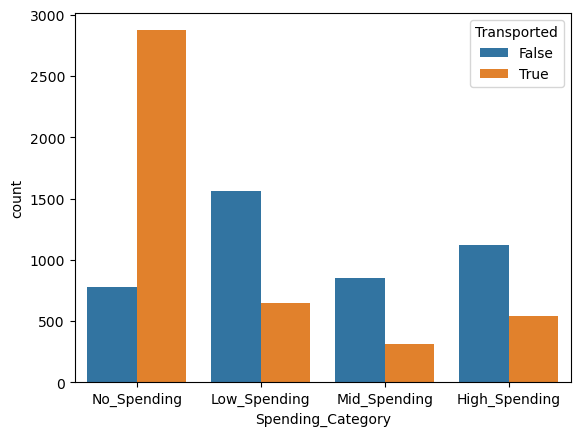

In [38]:
# Creating Count Plot for Spending_Category vs Transported
sns.countplot(data = titanic_df_train, x="Spending_Category", hue = "Transported")
plt.show()

### CrysoSleep and Spending

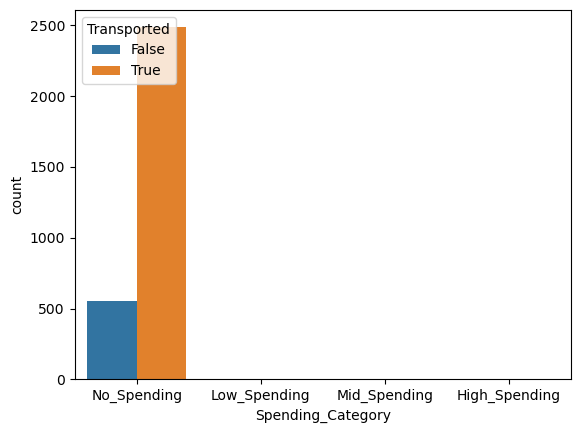

In [39]:
# Creating Count Plot for Spending_Category vs Transported
sns.countplot(data = titanic_df_train[titanic_df_train['CryoSleep'] == True], x="Spending_Category", hue = "Transported")
plt.show()

# People in CrysoSleep are not spending and are exposed to being affected by the anomaly

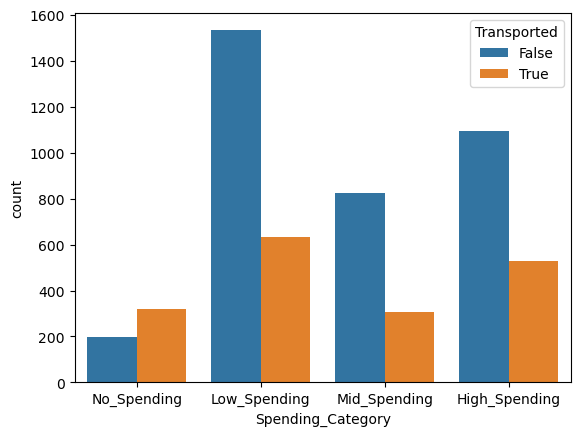

In [40]:
# Creating Count Plot for Spending_Category vs Transported
sns.countplot(data = titanic_df_train[titanic_df_train['CryoSleep'] == False], x="Spending_Category", hue = "Transported")
plt.show()

# People who are not spending are also exposed to being transported 

### VIP and Spending

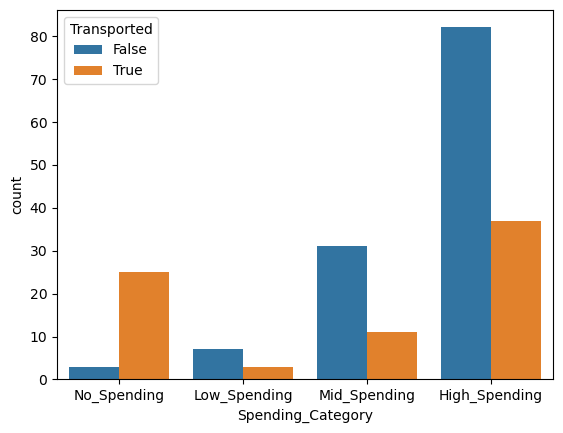

In [41]:
# Creating Count Plot for VIP, Spending, and Transported
sns.countplot(data = titanic_df_train[titanic_df_train['VIP'] == True], x="Spending_Category", hue = "Transported")
plt.show()

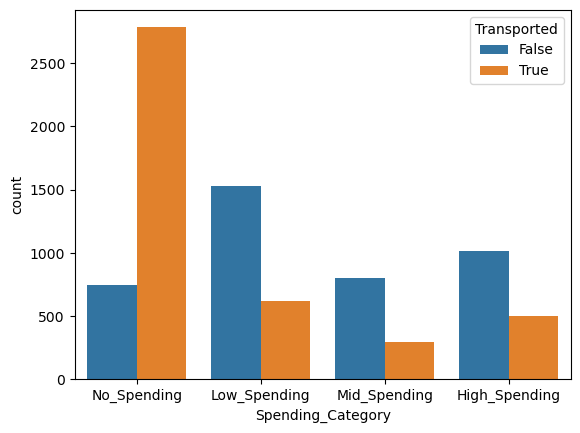

In [42]:
# Creating Count Plot for non VIP, Spending, and Transported
sns.countplot(data = titanic_df_train[titanic_df_train['VIP'] == False], x="Spending_Category", hue = "Transported")
plt.show()


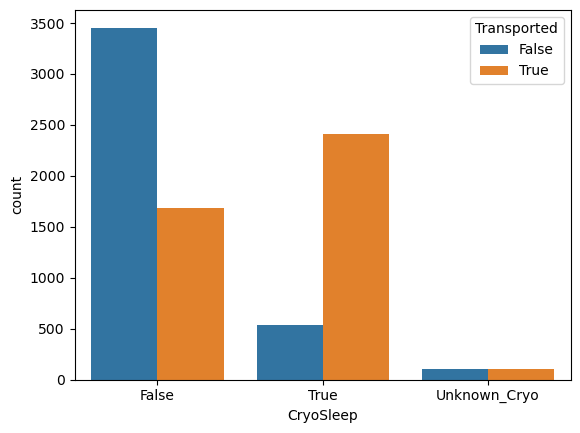

In [43]:
sns.countplot(data = titanic_df_train[titanic_df_train['VIP'] == False], 
              x="CryoSleep", hue = "Transported")
plt.show()

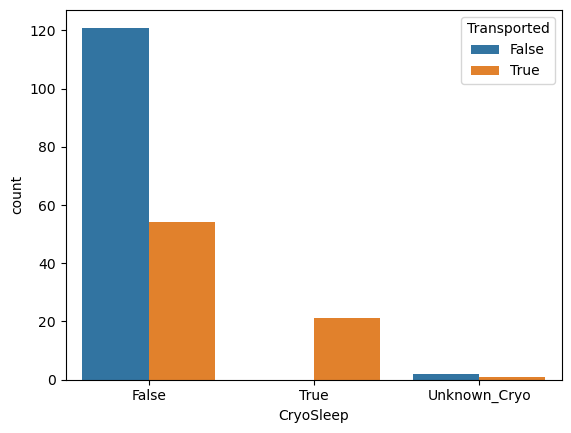

In [44]:
sns.countplot(data = titanic_df_train[titanic_df_train['VIP'] == True], 
              x="CryoSleep", hue = "Transported")
plt.show()

Spending_Category  Age_Bracket
No_Spending        Mid_Age        0.305391
                   Low_Age        0.237095
                   High_Age       0.098904
Low_Spending       Mid_Age        0.090224
High_Spending      Mid_Age        0.081087
Mid_Spending       Mid_Age        0.038374
High_Spending      High_Age       0.028323
Low_Spending       Low_Age        0.028095
                   High_Age       0.026496
Mid_Spending       High_Age       0.017131
No_Spending        Old_Age        0.014847
Mid_Spending       Low_Age        0.014162
High_Spending      Low_Age        0.010964
                   Old_Age        0.004111
Low_Spending       Old_Age        0.002969
Mid_Spending       Old_Age        0.001827
dtype: float64


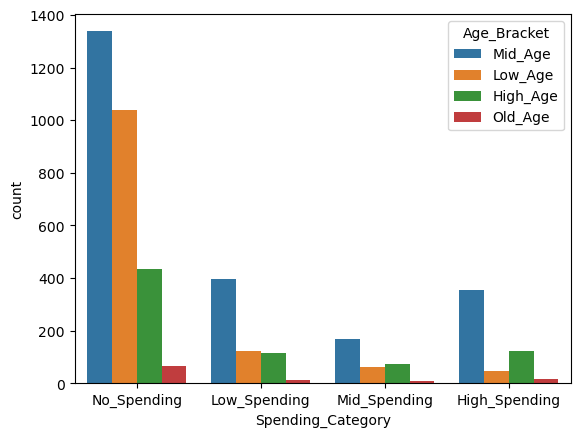

In [45]:
# Transported Count Based on Age And Spending
Transported = titanic_df_train[titanic_df_train["Transported"] == True]
AgeSpending_Transported = Transported[['Spending_Category', 'Age_Bracket']].value_counts(normalize = True)
print(AgeSpending_Transported)

sns.countplot(data = titanic_df_train[titanic_df_train["Transported"] == True], 
              x="Spending_Category", hue = "Age_Bracket")
plt.show()

# ENGINEERING NEW FEATURES

In [46]:
# Assign binary values for HomePlanet
destination_dummies = pd.get_dummies(titanic_df['HomePlanet'])
titanic_df = pd.concat([titanic_df, destination_dummies], axis=1)

# Assign binary values for CryoSleep
CryoSleep_dummies = pd.get_dummies(titanic_df['CryoSleep'])
titanic_df = pd.concat([titanic_df, CryoSleep_dummies], axis=1)
titanic_df = titanic_df.rename(columns={True: 'In_CryoSleep',False : 'Not_In_Cryo'})

# Assign binary values for Deck
deck_dummies = pd.get_dummies(titanic_df['Deck'])
titanic_df = pd.concat([titanic_df, deck_dummies], axis=1)

# Assign binary values for Cabin Location
CabinLoc_dummies = pd.get_dummies(titanic_df['Cabin_Location'])
titanic_df = pd.concat([titanic_df, CabinLoc_dummies], axis=1)

# Assign binary values for Side
Side_dummies = pd.get_dummies(titanic_df['Side'])
titanic_df = pd.concat([titanic_df, Side_dummies], axis=1)

# Assign binary values for Destination
destination_dummies = pd.get_dummies(titanic_df['Destination'])
titanic_df = pd.concat([titanic_df, destination_dummies], axis=1)
titanic_df = titanic_df.rename(columns={'55 Cancri e': 'Cancri',
                                        'PSO J318.5-22' : 'PSO',
                                        'TRAPPIST-1e' : 'TRAPPIST'})

# Assign binary values for Age
age_dummies = pd.get_dummies(titanic_df['Age_Bracket'])
titanic_df = pd.concat([titanic_df, age_dummies], axis=1)

# Assign binary values for Spending Category
SpendingCat_dummies = pd.get_dummies(titanic_df['Spending_Category'])
titanic_df = pd.concat([titanic_df, SpendingCat_dummies], axis=1)

# Strippign spaces from Colim names
titanic_df = titanic_df.rename(columns=lambda x: x.strip())

In [47]:
# Convert Objects/Boolean to Integers
titanic_df['Transported'] = titanic_df[ titanic_df['set'] == 'Training' ]['Transported'].astype(int)

In [48]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   index              12970 non-null  int64   
 1   PassengerId        12970 non-null  object  
 2   HomePlanet         12970 non-null  object  
 3   CryoSleep          12970 non-null  object  
 4   Cabin              12671 non-null  object  
 5   Destination        12970 non-null  object  
 6   Age                12970 non-null  float64 
 7   VIP                12970 non-null  object  
 8   RoomService        12970 non-null  float64 
 9   FoodCourt          12970 non-null  float64 
 10  ShoppingMall       12970 non-null  float64 
 11  Spa                12970 non-null  float64 
 12  VRDeck             12970 non-null  float64 
 13  Name               12676 non-null  object  
 14  Transported        8693 non-null   float64 
 15  set                12970 non-null  object  
 16  Deck

In [49]:
# Dropping unnecessary columns

# LOGISTIC REGRESSION

In [50]:
for val in titanic_df:
    print(f" {val} + ")

 index + 
 PassengerId + 
 HomePlanet + 
 CryoSleep + 
 Cabin + 
 Destination + 
 Age + 
 VIP + 
 RoomService + 
 FoodCourt + 
 ShoppingMall + 
 Spa + 
 VRDeck + 
 Name + 
 Transported + 
 set + 
 Deck + 
 Cabin_Number + 
 Side + 
 Age_Bracket + 
 TOTAL_EXPENSES + 
 group + 
 id + 
 Grouped + 
 Cabin_Location + 
 Spending_Category + 
 Earth + 
 Europa + 
 Mars + 
 Unkwn_HomePlanet + 
 Not_In_Cryo + 
 In_CryoSleep + 
 Unknown_Cryo + 
 A + 
 B + 
 C + 
 D + 
 E + 
 F + 
 G + 
 T + 
 Unknown_Cabin + 
 NO_CABIN + 
 FRONT + 
 MIDDLE + 
 BACK + 
 Unkwn_Cabin + 
 P + 
 S + 
 Unknown_Side + 
 Cancri + 
 PSO + 
 TRAPPIST + 
 Unkwn_Destination + 
 High_Age + 
 Low_Age + 
 Mid_Age + 
 Old_Age + 
 No_Spending + 
 Low_Spending + 
 Mid_Spending + 
 High_Spending + 


In [51]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """Transported ~ Grouped +
                                                      Earth + 
                                                      Europa +
                                                      In_CryoSleep +
                                                      A +
                                                      B +
                                                      C +
                                                      D +
                                                      F +
                                                      E +
                                                      MIDDLE +
                                                      TRAPPIST +
                                                      Cancri +
                                                      Low_Age +
                                                      Mid_Age +
                                                      RoomService + 
                                                      FoodCourt + 
                                                      ShoppingMall + 
                                                      Spa + 
                                                      VRDeck +
                                                      S +
                                                      P +
                                                      No_Spending
                                                             """, 
                                                                                             
                           data    = titanic_df[titanic_df['set'] == 'Training'])


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.422217
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.391    
Dependent Variable: Transported      AIC:              7388.6589
Date:               2023-03-13 12:56 BIC:              7558.3455
No. Observations:   8693             Log-Likelihood:   -3670.3  
Df Model:           23               LL-Null:          -6025.3  
Df Residuals:       8669             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     8.0000                                      
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept       -0.2372   0.2490  -0.9525 0.3408 -0.7252  0.2509
Grouped          0.0459   0.0639   0.7182 0.4727 -0.0794  0.1712
Earth           -0.3564   0.0944  -3.7761 0.0002 -0.5414 -0.1714
Europa           1.0929   0.2108   5.1841 0.0000  0.6797  1.5061
In_CryoSleep     0.9084   0.1095   8.2934 0.0000  0.6937  1.1231
A                0.0196   0.2975   0.0660 0.9474 -0.5634  0.6026
B                1.2693   0.2724   4.6595 0.0000  0.7354  1.8032
C                2.3816   0.3007   7.9194 0.0000  1.7922  2.9711
D                0.8220   0.1911   4.3014 0.0000  0.4474  1.1965
F                0.7139   0.0893   7.9984 0.0000  0.5390  0.8889
E                0.3232   0.1236   2.6156 0.0089  0.0810  0.5653
MIDDLE           0.8091   0.0699  11.5716 0.0000  0.6720  0.9461
TRAPPIST        -0.1443   0.0864  -1.6697 0.0950 -0.3137  0.0251
Cancri           0.3048   0.1084   2.8119 0.0049  0.0923  0.5173
Low_Age          0.1207   0.0938   1.2865 0.1983 -0.0632  0.3045
Mid_Age         -0.0888   0.0797  -1.1134 0.2655 -0.2451  0.0675
RoomService     -0.0013   0.0001 -14.4233 0.0000 -0.0015 -0.0012
FoodCourt        0.0005   0.0000  13.2276 0.0000  0.0005  0.0006
ShoppingMall     0.0007   0.0001   9.3061 0.0000  0.0005  0.0008
Spa             -0.0019   0.0001 -18.0701 0.0000 -0.0021 -0.0017
VRDeck          -0.0018   0.0001 -17.4419 0.0000 -0.0020 -0.0016
S               -0.2136   0.2112  -1.0114 0.3118 -0.6275  0.2003
P               -0.8098   0.2114  -3.8309 0.0001 -1.2241 -0.3955
No_Spending      0.8091   0.1307   6.1890 0.0000  0.5529  1.0654
================================================================

"""

### X VARIABLE

In [52]:
x_var = ['Grouped','Earth', 'Europa', 'In_CryoSleep',
        'A', 'B', 'C', 'D', 'E', 'F',
        'MIDDLE', 'BACK', 'PSO', 'Cancri',
        'Low_Age', 'Mid_Age',
        'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
        'S', 'P', 'No_Spending',
         ]

### BUILDING THE MODEL

In [53]:
# setting explanatory variable(s) with most correlated x-variable
x_train = titanic_df[ x_var ][ titanic_df['set'] == 'Training' ]

# setting response variable
y_train = titanic_df[ 'Transported' ][ titanic_df['set']   == 'Training' ]

In [54]:
# developing training and validation sets
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
            x_train,
            y_train.astype(dtype = 'int'),
            random_state = 123,
            test_size    = 0.25,
            stratify     = y_train)

In [55]:
# picking a model name
model_name = "Logistic Regression"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.LogisticRegression()


# FITTING to the training data
model_fit = model.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
model_train_pred = model_fit.predict(x_train_1)
model_valid_pred = model_fit.predict(x_train_2)


# SCORING the results (accuracy)
model_train_score = model.score(x_train_1, y_train_1).round(4) # training accuracy
model_valid_score = model.score(x_train_2, y_train_2).round(4) # validation accuracy

# SCORING the results (auc)
model_train_auc = roc_auc_score(y_true  = y_train_1,
                                y_score = model_train_pred).round(decimals = 4)

model_valid_auc = roc_auc_score(y_true  = y_train_2,
                                y_score = model_valid_pred).round(decimals = 4)

# displaying results
print('Training Accuracy:  ', model_train_score)
print('Validation Accuracy:', model_valid_score)
print('Training AUC:       ', model_train_auc)
print('Validation AUC:     ', model_valid_auc)

Training Accuracy:   0.7903
Validation Accuracy: 0.7971
Training AUC:        0.79
Validation AUC:      0.7967


C:\Users\hanzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### PREDICTING

In [56]:
# setting x_test
x_test  = titanic_df[x_var][ titanic_df['set'] == 'Testing' ]

# PREDICTING on new data
model_pred = model.predict(x_test)

# checking results
model_pred

array([1, 0, 1, ..., 1, 1, 1])

In [57]:
# saving predictions with their respective Ids from the test set
predictions = pd.DataFrame(data = { 'PassengerId' : titanic_test['PassengerId'],
                                    'Transported' : model_pred.astype(bool)               } )

# checking the results
predictions.head(n = 5)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [58]:
# sending predictions to .csv file
predictions.to_csv(path_or_buf = 'submission.csv',
                   index = False)

# GRADIENT BOOSTING CLASSIFIER

### BUILDING THE MODEL

In [59]:
# setting explanatory variable(s) with most correlated x-variable
x_train = titanic_df[ x_var ][ titanic_df['set'] == 'Training' ]


# setting response variable
y_train = titanic_df['Transported' ][ titanic_df['set']   == 'Training' ]

In [60]:
# developing training and validation sets
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
            x_train,
            y_train.astype(dtype = 'int'),
            random_state = 123,
            test_size    = 0.25,
            stratify     = y_train)

In [61]:
# picking a model name

model_name = "gradient Boosting Classifier"

# INSTANTIATING a model object - CHANGE THIS AS NEEDED

gbc = sklearn.ensemble.GradientBoostingClassifier( n_estimators = 200,
                                                   criterion = 'squared_error',
                                                   random_state = 219,
                                                   max_features = 'auto')

# FITTING to the training data

gbc_fit = gbc.fit(x_train_1, y_train_1)

# PREDICTING on the response variable

gbc_train_pred = gbc_fit.predict(x_train_1)
gbc_test_pred = gbc_fit.predict(x_train_2)

# SCORING the results (accuracy)

gbc_train_score = gbc.score(x_train_1, y_train_1).round(4) # training accuracy
gbc_test_score = gbc.score(x_train_2, y_train_2).round(4) # testing accuracy

# SCORING the results (auc)

gbc_train_auc = roc_auc_score(y_true = y_train_1,
y_score = gbc_train_pred).round(decimals = 4)

gbc_test_auc = roc_auc_score(y_true = y_train_2,
y_score = gbc_test_pred).round(decimals = 4)

# displaying results

print('Training Accuracy: ', gbc_train_score)
print('Testing Accuracy:', gbc_test_score)
print('Training AUC: ', gbc_train_auc)
print('Testing AUC: ', gbc_test_auc)

Training Accuracy:  0.829
Testing Accuracy: 0.8105
Training AUC:  0.8288
Testing AUC:  0.8102


### PREDICTING

In [62]:
# setting x_test
x_test  = titanic_df[x_var][ titanic_df['set'] == 'Testing' ]

# PREDICTING on new data
model_pred = gbc.predict(x_test)

# checking results
model_pred

array([1, 0, 1, ..., 1, 1, 1])

In [63]:
# saving predictions with their respective Ids from the test set
predictions = pd.DataFrame(data = { 'PassengerId' : titanic_test['PassengerId'],
                                    'Transported' : model_pred.astype(bool)               } )

# checking the results
predictions.head(n = 5)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [64]:
# sending predictions to .csv file
predictions.to_csv(path_or_buf = 'submission_gbm.csv',
                   index = False)

# CATBOOSTING CLASSIFIER

### BUILDING THE MODEL

In [65]:
# setting explanatory variable(s) with most correlated x-variable
x_train = titanic_df[ x_var ][ titanic_df['set'] == 'Training' ]


# setting response variable
y_train = titanic_df['Transported' ][ titanic_df['set']   == 'Training' ]

In [66]:
# developing training and validation sets
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
            x_train,
            y_train.astype(dtype = 'int'),
            random_state = 123,
            test_size    = 0.25,
            stratify     = y_train)

In [67]:
help(CatBoostClassifier())

Help on CatBoostClassifier in module catboost.core object:

class CatBoostClassifier(CatBoost)
 |  CatBoostClassifier(iterations=None, learning_rate=None, depth=None, l2_leaf_reg=None, model_size_reg=None, rsm=None, loss_function=None, border_count=None, feature_border_type=None, per_float_feature_quantization=None, input_borders=None, output_borders=None, fold_permutation_block=None, od_pval=None, od_wait=None, od_type=None, nan_mode=None, counter_calc_method=None, leaf_estimation_iterations=None, leaf_estimation_method=None, thread_count=None, random_seed=None, use_best_model=None, best_model_min_trees=None, verbose=None, silent=None, logging_level=None, metric_period=None, ctr_leaf_count_limit=None, store_all_simple_ctr=None, max_ctr_complexity=None, has_time=None, allow_const_label=None, target_border=None, classes_count=None, class_weights=None, auto_class_weights=None, class_names=None, one_hot_max_size=None, random_strength=None, name=None, ignored_features=None, train_dir=None,

In [68]:
# picking a model name

model_name = "Cat Boosting Classifier"

# INSTANTIATING a model object - CHANGE THIS AS NEEDED

cbc = CatBoostClassifier()

# FITTING to the training data

cbc_fit = cbc.fit(x_train_1, y_train_1)

# PREDICTING on the response variable

cbc_train_pred = cbc_fit.predict(x_train_1)
cbc_test_pred = cbc_fit.predict(x_train_2)

# SCORING the results (accuracy)

cbc_train_score = cbc.score(x_train_1, y_train_1).round(4) # training accuracy
cbc_test_score = cbc.score(x_train_2, y_train_2).round(4) # testing accuracy

# SCORING the results (auc)

cbc_train_auc = roc_auc_score(y_true = y_train_1,
y_score = cbc_train_pred).round(decimals = 4)

cbc_test_auc = roc_auc_score(y_true = y_train_2,
y_score = cbc_test_pred).round(decimals = 4)

# displaying results

print('Training Accuracy: ', cbc_train_score)
print('Testing Accuracy:', cbc_test_score)
print('Training AUC: ', cbc_train_auc)
print('Testing AUC: ', cbc_test_auc)

Learning rate set to 0.02294
0:	learn: 0.6808952	total: 137ms	remaining: 2m 16s
1:	learn: 0.6698933	total: 141ms	remaining: 1m 10s
2:	learn: 0.6598004	total: 143ms	remaining: 47.6s
3:	learn: 0.6486115	total: 145ms	remaining: 36.2s
4:	learn: 0.6390479	total: 147ms	remaining: 29.3s
5:	learn: 0.6315725	total: 150ms	remaining: 24.8s
6:	learn: 0.6224736	total: 152ms	remaining: 21.5s
7:	learn: 0.6150326	total: 154ms	remaining: 19.1s
8:	learn: 0.6092887	total: 156ms	remaining: 17.2s
9:	learn: 0.6023417	total: 158ms	remaining: 15.7s
10:	learn: 0.5959207	total: 161ms	remaining: 14.5s
11:	learn: 0.5904982	total: 164ms	remaining: 13.5s
12:	learn: 0.5848786	total: 166ms	remaining: 12.6s
13:	learn: 0.5795805	total: 168ms	remaining: 11.8s
14:	learn: 0.5739772	total: 171ms	remaining: 11.2s
15:	learn: 0.5681650	total: 173ms	remaining: 10.6s
16:	learn: 0.5636028	total: 175ms	remaining: 10.1s
17:	learn: 0.5587268	total: 177ms	remaining: 9.67s
18:	learn: 0.5536555	total: 180ms	remaining: 9.28s
19:	learn:

182:	learn: 0.3955259	total: 550ms	remaining: 2.45s
183:	learn: 0.3953810	total: 552ms	remaining: 2.45s
184:	learn: 0.3952871	total: 554ms	remaining: 2.44s
185:	learn: 0.3950911	total: 556ms	remaining: 2.43s
186:	learn: 0.3949667	total: 558ms	remaining: 2.43s
187:	learn: 0.3947269	total: 561ms	remaining: 2.42s
188:	learn: 0.3943497	total: 563ms	remaining: 2.42s
189:	learn: 0.3940453	total: 566ms	remaining: 2.41s
190:	learn: 0.3939170	total: 568ms	remaining: 2.41s
191:	learn: 0.3935895	total: 570ms	remaining: 2.4s
192:	learn: 0.3934620	total: 572ms	remaining: 2.39s
193:	learn: 0.3932332	total: 575ms	remaining: 2.39s
194:	learn: 0.3929375	total: 577ms	remaining: 2.38s
195:	learn: 0.3927446	total: 579ms	remaining: 2.38s
196:	learn: 0.3926240	total: 581ms	remaining: 2.37s
197:	learn: 0.3923927	total: 584ms	remaining: 2.36s
198:	learn: 0.3921197	total: 586ms	remaining: 2.36s
199:	learn: 0.3920097	total: 588ms	remaining: 2.35s
200:	learn: 0.3918255	total: 590ms	remaining: 2.35s
201:	learn: 0

358:	learn: 0.3663745	total: 939ms	remaining: 1.68s
359:	learn: 0.3662902	total: 941ms	remaining: 1.67s
360:	learn: 0.3661353	total: 943ms	remaining: 1.67s
361:	learn: 0.3660613	total: 945ms	remaining: 1.67s
362:	learn: 0.3659457	total: 947ms	remaining: 1.66s
363:	learn: 0.3658583	total: 949ms	remaining: 1.66s
364:	learn: 0.3657537	total: 951ms	remaining: 1.65s
365:	learn: 0.3656454	total: 953ms	remaining: 1.65s
366:	learn: 0.3655877	total: 956ms	remaining: 1.65s
367:	learn: 0.3654539	total: 958ms	remaining: 1.64s
368:	learn: 0.3653804	total: 960ms	remaining: 1.64s
369:	learn: 0.3651124	total: 962ms	remaining: 1.64s
370:	learn: 0.3650171	total: 964ms	remaining: 1.64s
371:	learn: 0.3647420	total: 967ms	remaining: 1.63s
372:	learn: 0.3646587	total: 969ms	remaining: 1.63s
373:	learn: 0.3645331	total: 971ms	remaining: 1.63s
374:	learn: 0.3643756	total: 973ms	remaining: 1.62s
375:	learn: 0.3642986	total: 975ms	remaining: 1.62s
376:	learn: 0.3641848	total: 978ms	remaining: 1.61s
377:	learn: 

550:	learn: 0.3432601	total: 1.35s	remaining: 1.1s
551:	learn: 0.3431609	total: 1.36s	remaining: 1.1s
552:	learn: 0.3431083	total: 1.36s	remaining: 1.1s
553:	learn: 0.3429484	total: 1.36s	remaining: 1.1s
554:	learn: 0.3428448	total: 1.36s	remaining: 1.09s
555:	learn: 0.3427866	total: 1.37s	remaining: 1.09s
556:	learn: 0.3426746	total: 1.37s	remaining: 1.09s
557:	learn: 0.3425995	total: 1.37s	remaining: 1.09s
558:	learn: 0.3425285	total: 1.37s	remaining: 1.08s
559:	learn: 0.3423963	total: 1.38s	remaining: 1.08s
560:	learn: 0.3422866	total: 1.38s	remaining: 1.08s
561:	learn: 0.3422158	total: 1.38s	remaining: 1.07s
562:	learn: 0.3420633	total: 1.38s	remaining: 1.07s
563:	learn: 0.3418683	total: 1.38s	remaining: 1.07s
564:	learn: 0.3417806	total: 1.39s	remaining: 1.07s
565:	learn: 0.3416942	total: 1.39s	remaining: 1.06s
566:	learn: 0.3416043	total: 1.39s	remaining: 1.06s
567:	learn: 0.3415001	total: 1.39s	remaining: 1.06s
568:	learn: 0.3414562	total: 1.39s	remaining: 1.06s
569:	learn: 0.34

738:	learn: 0.3259690	total: 1.76s	remaining: 622ms
739:	learn: 0.3258364	total: 1.76s	remaining: 619ms
740:	learn: 0.3257248	total: 1.76s	remaining: 617ms
741:	learn: 0.3256113	total: 1.77s	remaining: 614ms
742:	learn: 0.3255219	total: 1.77s	remaining: 612ms
743:	learn: 0.3254568	total: 1.77s	remaining: 610ms
744:	learn: 0.3253614	total: 1.77s	remaining: 607ms
745:	learn: 0.3252573	total: 1.78s	remaining: 605ms
746:	learn: 0.3251825	total: 1.78s	remaining: 603ms
747:	learn: 0.3251241	total: 1.78s	remaining: 600ms
748:	learn: 0.3250232	total: 1.78s	remaining: 598ms
749:	learn: 0.3249533	total: 1.78s	remaining: 595ms
750:	learn: 0.3248451	total: 1.79s	remaining: 593ms
751:	learn: 0.3247015	total: 1.79s	remaining: 590ms
752:	learn: 0.3246105	total: 1.79s	remaining: 588ms
753:	learn: 0.3245540	total: 1.79s	remaining: 585ms
754:	learn: 0.3244833	total: 1.8s	remaining: 583ms
755:	learn: 0.3243924	total: 1.8s	remaining: 580ms
756:	learn: 0.3243133	total: 1.8s	remaining: 578ms
757:	learn: 0.3

924:	learn: 0.3115806	total: 2.16s	remaining: 175ms
925:	learn: 0.3115088	total: 2.17s	remaining: 173ms
926:	learn: 0.3114464	total: 2.17s	remaining: 171ms
927:	learn: 0.3113500	total: 2.17s	remaining: 168ms
928:	learn: 0.3112974	total: 2.17s	remaining: 166ms
929:	learn: 0.3112699	total: 2.18s	remaining: 164ms
930:	learn: 0.3111662	total: 2.18s	remaining: 161ms
931:	learn: 0.3110907	total: 2.18s	remaining: 159ms
932:	learn: 0.3110030	total: 2.18s	remaining: 157ms
933:	learn: 0.3109540	total: 2.19s	remaining: 154ms
934:	learn: 0.3109181	total: 2.19s	remaining: 152ms
935:	learn: 0.3108724	total: 2.19s	remaining: 150ms
936:	learn: 0.3108192	total: 2.19s	remaining: 147ms
937:	learn: 0.3107223	total: 2.19s	remaining: 145ms
938:	learn: 0.3106523	total: 2.2s	remaining: 143ms
939:	learn: 0.3106013	total: 2.2s	remaining: 140ms
940:	learn: 0.3105033	total: 2.2s	remaining: 138ms
941:	learn: 0.3104296	total: 2.2s	remaining: 136ms
942:	learn: 0.3103456	total: 2.21s	remaining: 133ms
943:	learn: 0.31

### PREDICTING

In [69]:
# setting x_test
x_test  = titanic_df[x_var][ titanic_df['set'] == 'Testing' ]

# PREDICTING on new data
model_pred = cbc.predict(x_test)

# checking results
model_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [70]:
# saving predictions with their respective Ids from the test set
predictions = pd.DataFrame(data = { 'PassengerId' : titanic_test['PassengerId'],
                                    'Transported' : model_pred.astype(bool)               } )

# checking the results
predictions.head(n = 5)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [71]:
# sending predictions to .csv file
predictions.to_csv(path_or_buf = 'submission_cbc.csv',
                   index = False)